In [1]:
import pandas as pd

In [2]:
entities_df = pd.read_csv('../data/SilasMarner/processed_characters.csv')
tokens_df = pd.read_csv('../data/SilasMarner/character-tagging/SilasMarner.tokens', delimiter='\t')
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
0,48,32,533,534,PROP,PER,Silas Marner,"father Silas , who had taken her golden curls ..."
1,49,32,538,538,PRON,PER,his,"father Silas , who had taken her golden curls ..."
2,55,32,573,573,PROP,PER,Silas,"father Silas , who had taken her golden curls ..."
3,61,32,675,675,PROP,PER,Marner,"father Silas , who had taken her golden curls ..."
4,62,32,683,683,PRON,PER,his,"father Silas , who had taken her golden curls ..."
...,...,...,...,...,...,...,...,...
6563,11688,32,86599,86599,PROP,PER,Silas,"father Silas , who had taken her golden curls ..."
6564,11690,61,86605,86605,PRON,PER,he,the artful Godfrey
6565,11691,144,86607,86607,PROP,PER,Eppie,little curly - headed Eppie
6566,11699,144,86672,86672,PROP,PER,Eppie,little curly - headed Eppie


In [3]:
tokens_df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,In,in,0,2,ADP,IN,prep,27,O
1,0,0,1,1,the,the,3,6,DET,DT,det,2,O
2,0,0,2,2,days,day,7,11,NOUN,NNS,pobj,0,O
3,0,0,3,3,when,when,12,16,SCONJ,WRB,advmod,8,O
4,0,0,4,4,the,the,17,20,DET,DT,det,7,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86688,814,2527,6,86688,than,than,391550,391554,SCONJ,IN,mark,86690,O
86689,814,2527,7,86689,we,we,391555,391557,PRON,PRP,nsubj,86690,O
86690,814,2527,8,86690,are,be,391558,391561,AUX,VBP,advcl,86687,O
86691,814,2527,9,86691,.,.,391561,391562,PUNCT,.,punct,86683,O


In [4]:
character_of_interest = 'father Silas , who had taken her golden curls for his lost guineas brought back to him'
token_window = 25

In [5]:
mentions_df = entities_df[entities_df.character_name == character_of_interest]
mentions_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,character_name
0,48,32,533,534,PROP,PER,Silas Marner,"father Silas , who had taken her golden curls ..."
1,49,32,538,538,PRON,PER,his,"father Silas , who had taken her golden curls ..."
2,55,32,573,573,PROP,PER,Silas,"father Silas , who had taken her golden curls ..."
3,61,32,675,675,PROP,PER,Marner,"father Silas , who had taken her golden curls ..."
4,62,32,683,683,PRON,PER,his,"father Silas , who had taken her golden curls ..."
...,...,...,...,...,...,...,...,...
6510,11561,32,85798,85798,PROP,PER,Silas,"father Silas , who had taken her golden curls ..."
6555,11658,32,86398,86399,PROP,PER,Silas Marner,"father Silas , who had taken her golden curls ..."
6556,11659,32,86413,86413,PRON,PER,he,"father Silas , who had taken her golden curls ..."
6557,11660,32,86419,86419,PRON,PER,himself,"father Silas , who had taken her golden curls ..."


In [6]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


sentiment_predictor = SentimentIntensityAnalyzer()

In [7]:
import string
sentiments_by_mentions = []


for _, row in mentions_df.iterrows():
    mention_tokens = []
    for _, token_row in tokens_df[max(row.start_token - token_window, 0):min(row.end_token + token_window, len(tokens_df) - 1)].iterrows():
        if isinstance(token_row.word, str) and token_row.word != '\t' and token_row.word not in string.punctuation:
            mention_tokens.append(token_row.word)
    try:
        polarity = sentiment_predictor.polarity_scores(' '.join(mention_tokens))['compound']
    except:
        print(mention_tokens)
    sentiments_by_mentions.append(polarity)

In [8]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

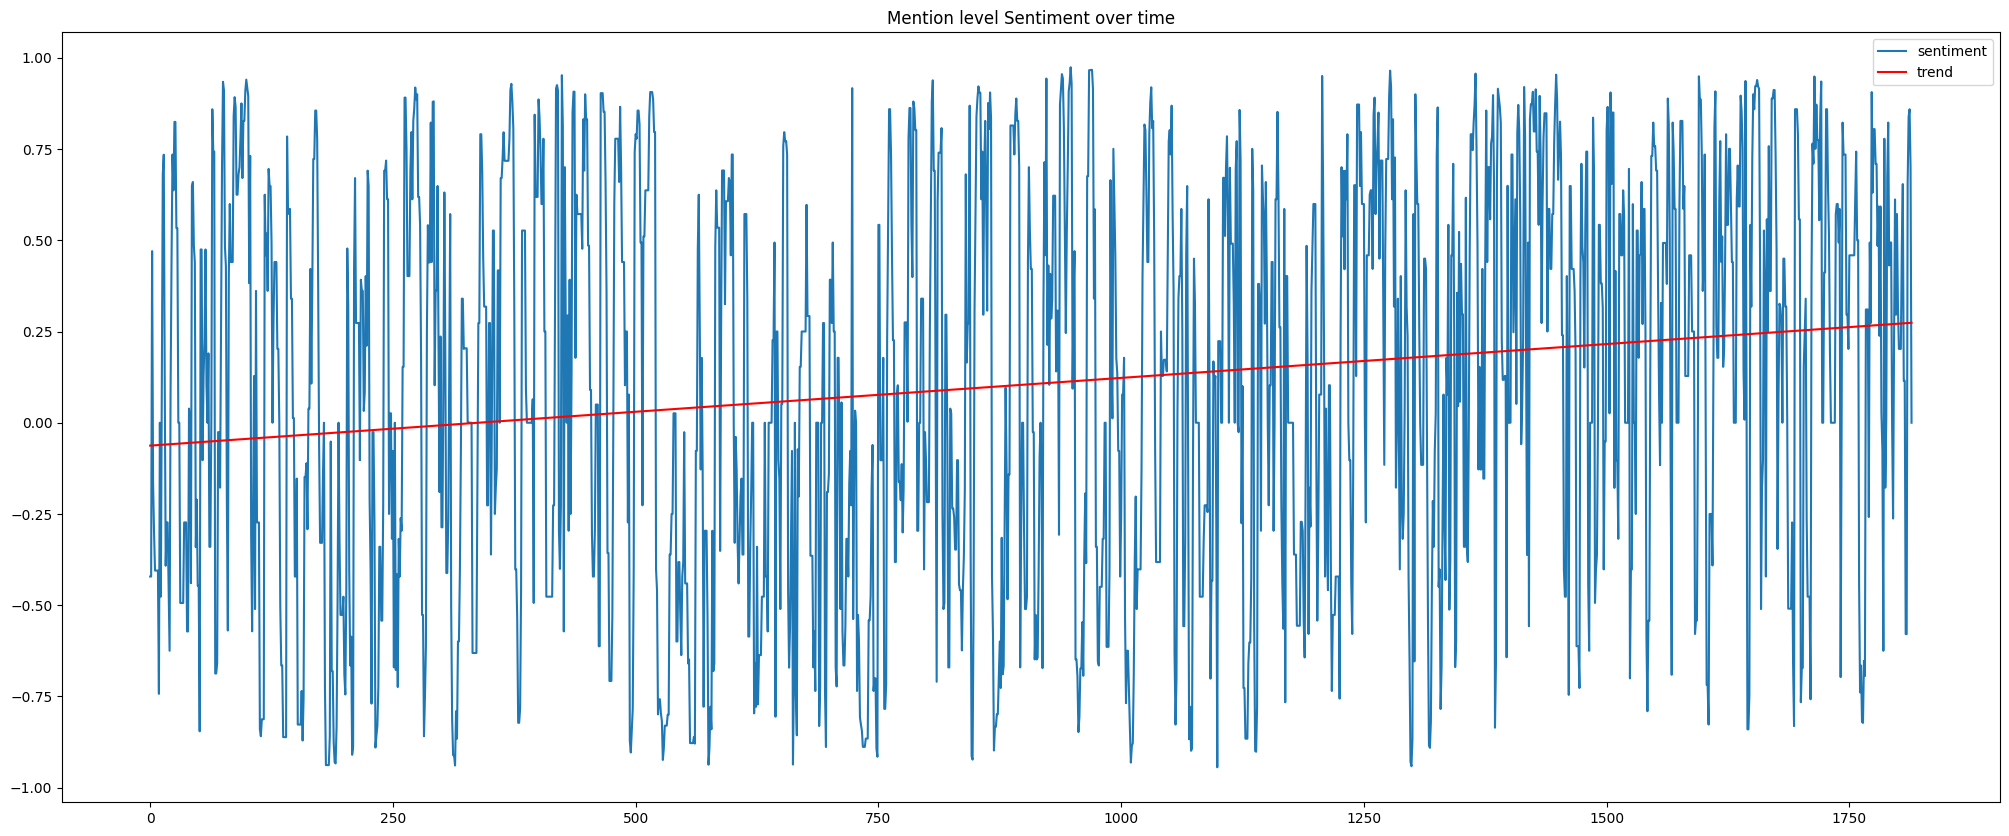

In [9]:
x = np.arange(len(sentiments_by_mentions))
slope, intercept = np.polyfit(x, sentiments_by_mentions, 1)

plt.plot(x, sentiments_by_mentions, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Mention level Sentiment over time')
plt.legend()
plt.show()

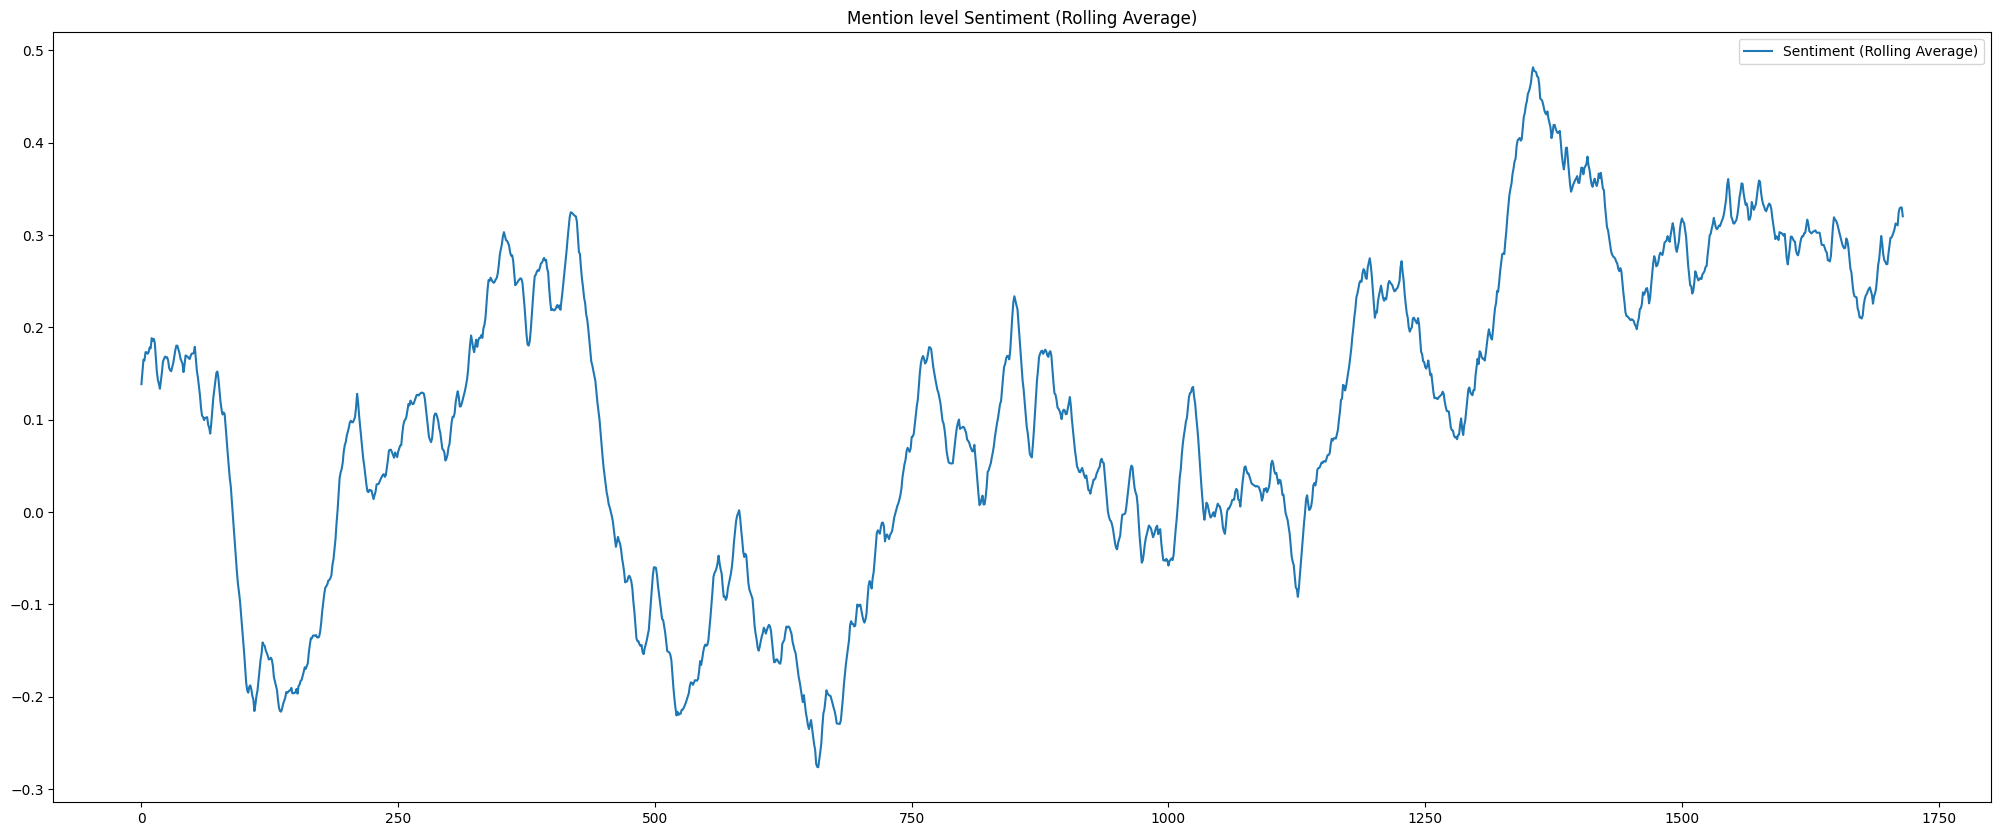

In [22]:
N = 100
rolling_average = pd.Series(sentiments_by_mentions).rolling(window=N).mean().iloc[N-1:].values

x = np.arange(len(rolling_average))

plt.plot(x, rolling_average, label='Sentiment (Rolling Average)')
plt.title('Mention level Sentiment (Rolling Average)')
plt.legend()
plt.show()

In [12]:
np.array(sentiments_by_mentions).shape

(1815,)